In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('titanic_data.csv')

In [6]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Types of features

- **Categorical**        -  Sex and Embarked
- **Continuous**         - Age, Fare
- **Discrete**           - Sib Sp, Parch
- **Alpha Numeric**      - Cabin

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Numerical Value Analysis

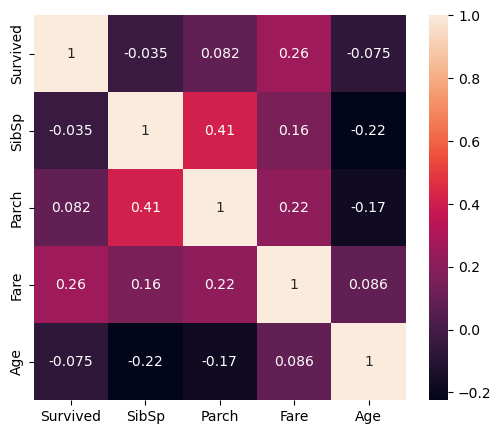

In [84]:
plt.figure(figsize = (6, 5))
heatmap = sns.heatmap(data[['Survived', 'SibSp', 'Parch', 'Fare', 'Age']].corr(), annot = True)

## <font color = 'green'>SibSp  - Number of Siblings / Spouses aboard the ship</font>

In [15]:
data['SibSp'].nunique()

7

In [16]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

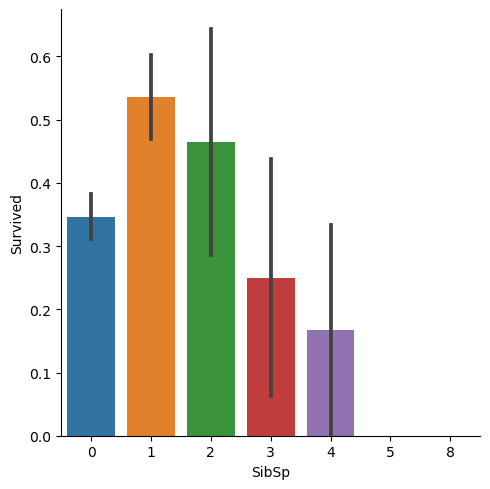

In [18]:
sns.catplot(x = 'SibSp', y = 'Survived', data = data, kind = 'bar')

## <font color = 'green'> Age </font>

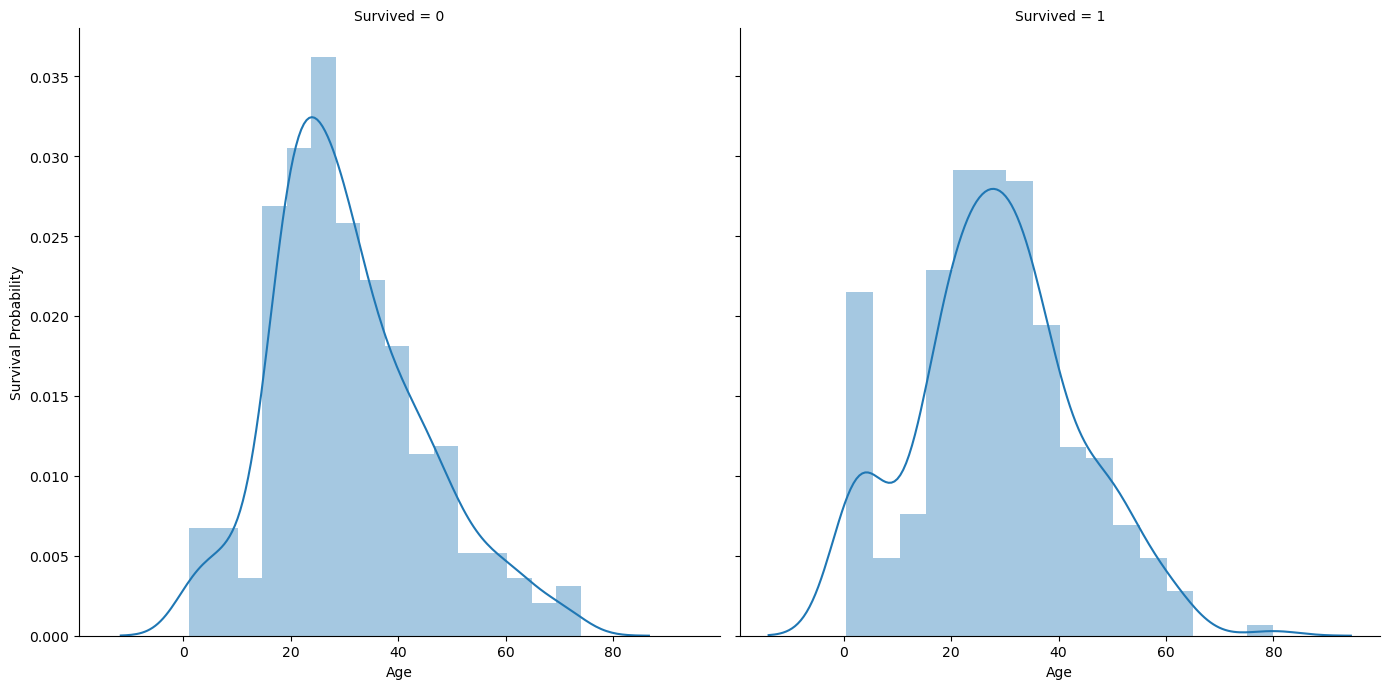

In [33]:
age_visual = sns.FacetGrid(data, col='Survived', height=7)
age_visual = age_visual.map(sns.distplot, 'Age').set_ylabels('Survival Probability')

## <font color = 'green'> Sex </font>

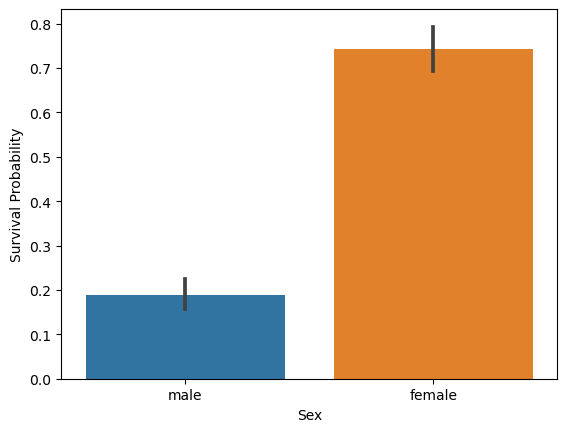

In [23]:
age_plot = sns.barplot(x = 'Sex', y = 'Survived', data = data).set_ylabel('Survival Probability')

## <font color = 'green'> PClass </font>

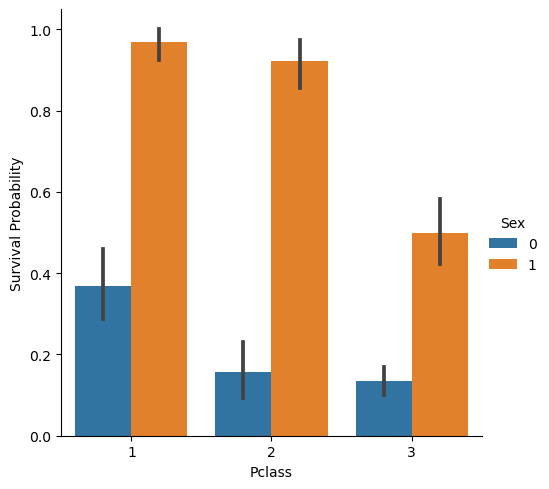

In [86]:
pclass = sns.catplot(x='Pclass', y='Survived', data=data, kind='bar', height=5, hue = 'Sex')
pclass = pclass.set_ylabels('Survival Probability')

## <font color = 'green'> Embarked </font>

In [35]:
data['Embarked'].isnull().sum()

2

In [36]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [37]:
data['Embarked'] = data['Embarked'].fillna('S')

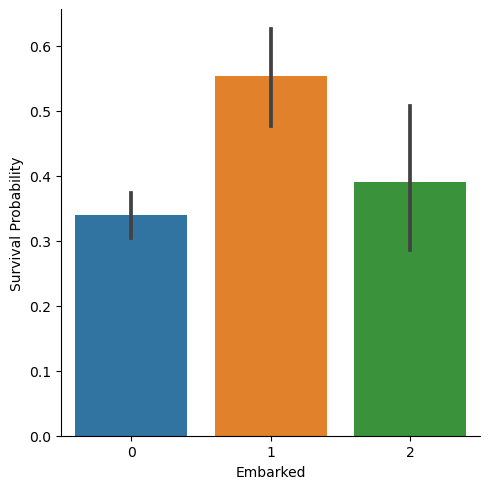

In [81]:
g = sns.catplot(x='Embarked', y='Survived', data=data, height=5, kind='bar')
g = g.set_ylabels('Survival Probability')

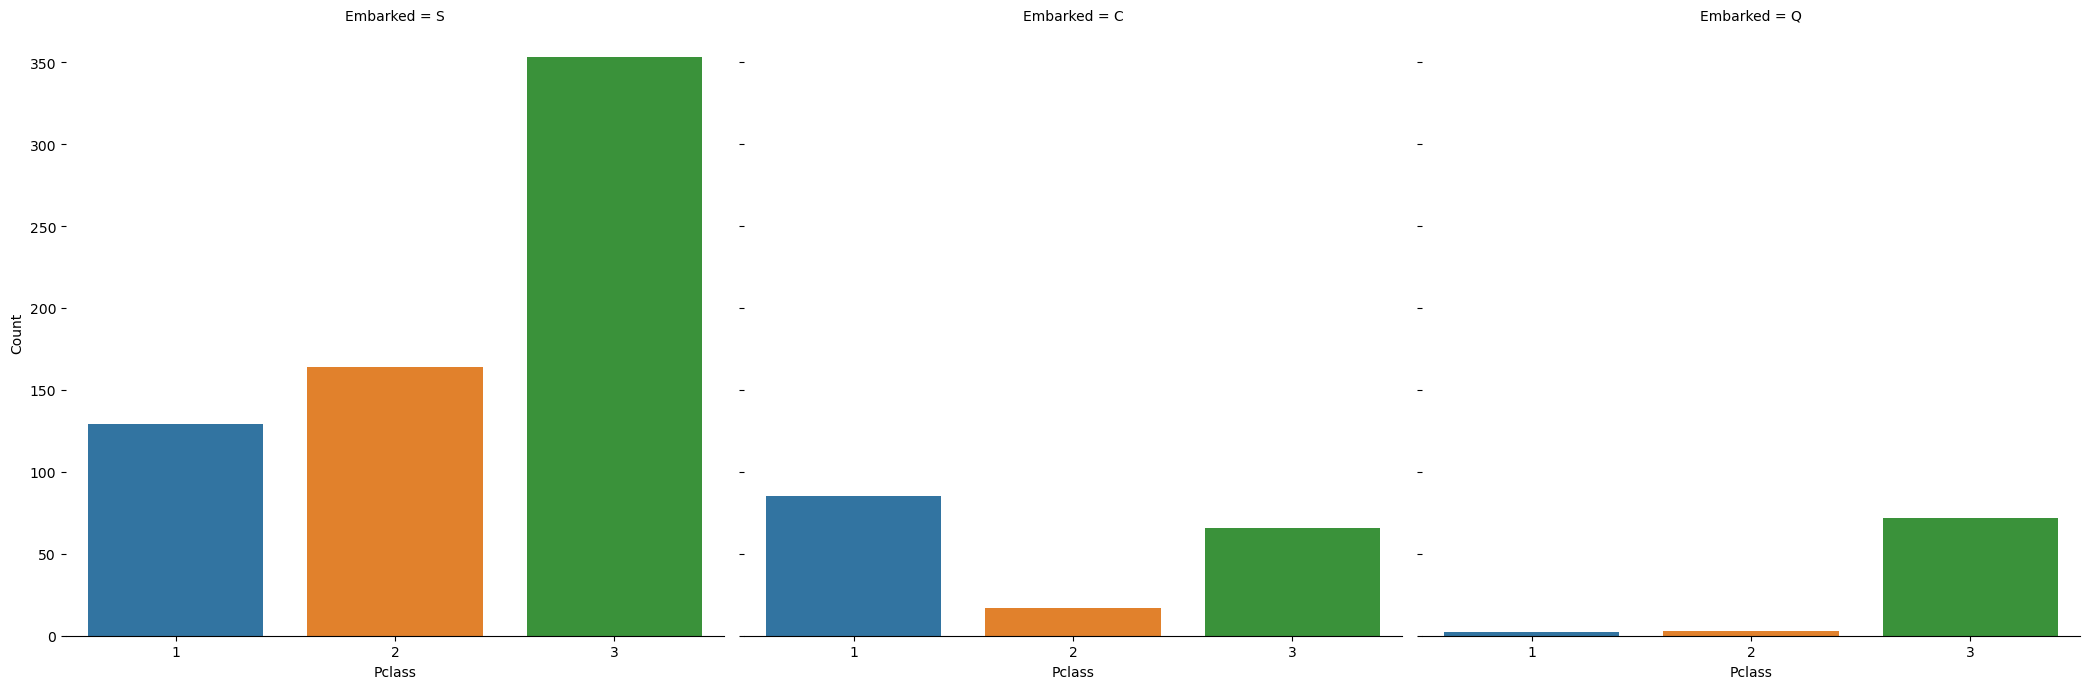

In [42]:
# Explore Pclass vs Embarked

g = sns.catplot(x='Pclass', col='Embarked', data=data, height=7, kind='count')
g.despine(left = True)
g = g.set_ylabels('Count')

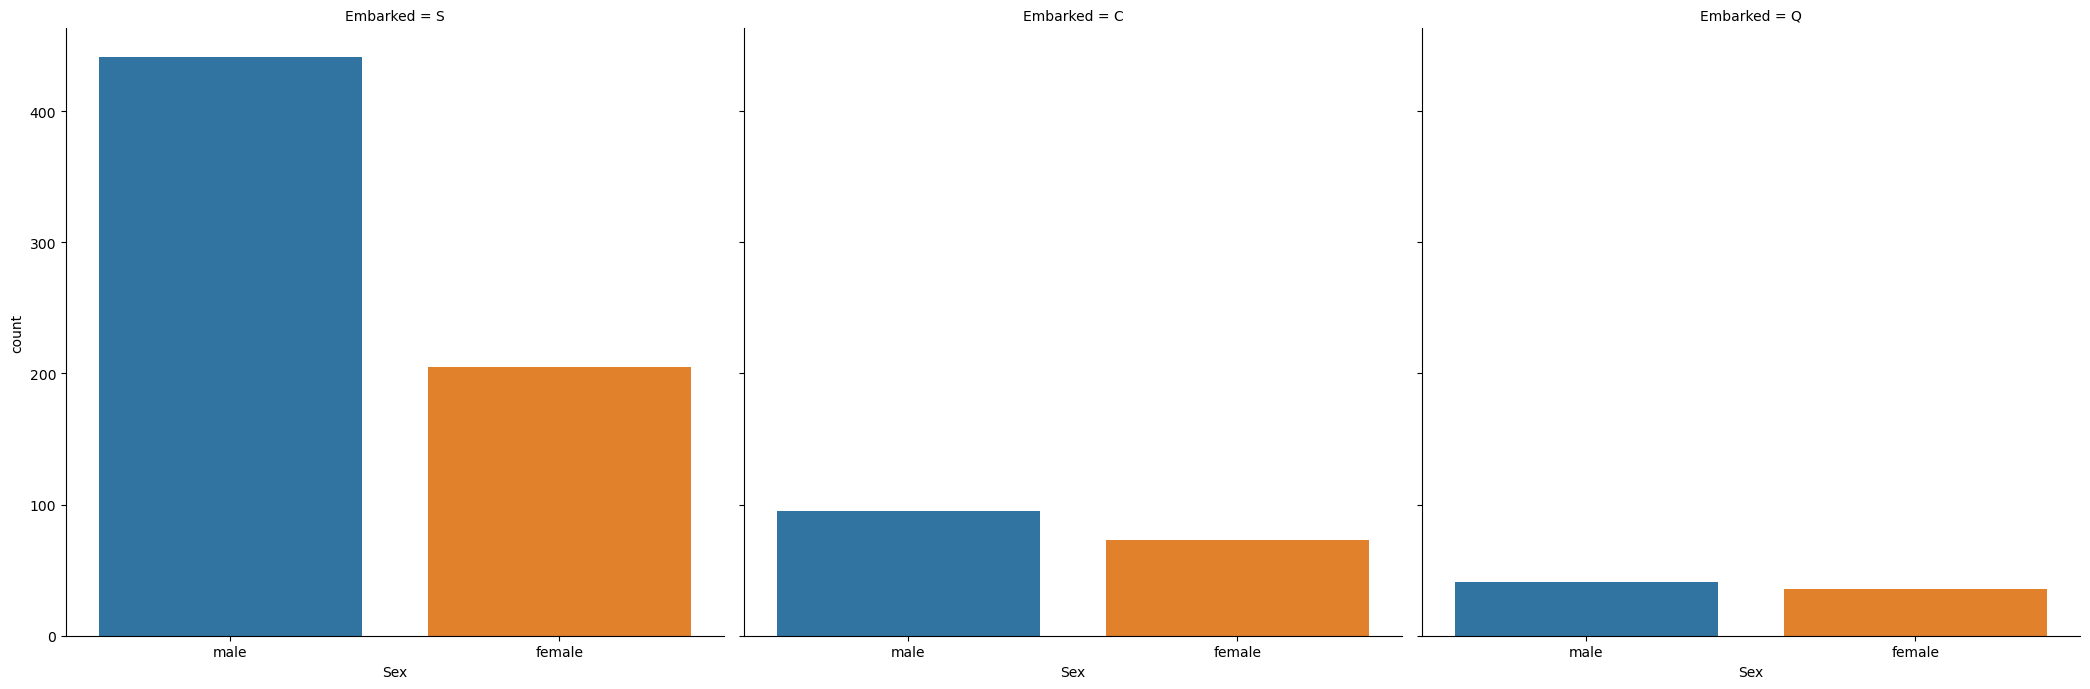

In [45]:
g = sns.catplot(x='Sex', col='Embarked', data=data, height=7, kind='count')

## Preparing Data

In [46]:
data = pd.read_csv('titanic_data.csv')

In [47]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [49]:
mean = data['Age'].mean()
std  = data['Age'].std()

is_null = data['Age'].isnull().sum()

In [51]:
print(mean, std, is_null)

29.69911764705882 14.526497332334044 177


In [52]:
rand_age = np.random.randint(mean - std, mean + std, size = is_null)

In [53]:
rand_age

array([36, 41, 20, 20, 42, 38, 42, 21, 35, 28, 16, 40, 22, 26, 40, 39, 17,
       35, 28, 41, 33, 19, 22, 18, 18, 37, 34, 31, 43, 39, 39, 19, 18, 40,
       35, 39, 37, 33, 19, 26, 36, 42, 29, 39, 38, 26, 36, 21, 40, 40, 24,
       30, 43, 30, 30, 34, 18, 21, 41, 42, 35, 37, 32, 18, 29, 37, 24, 25,
       23, 34, 39, 15, 23, 23, 37, 17, 28, 16, 39, 17, 18, 16, 28, 42, 39,
       35, 24, 26, 34, 19, 26, 30, 21, 19, 25, 40, 35, 34, 43, 25, 39, 37,
       27, 17, 31, 42, 17, 27, 21, 19, 15, 23, 15, 38, 17, 24, 15, 16, 27,
       31, 29, 32, 37, 30, 29, 40, 22, 34, 15, 36, 23, 39, 42, 16, 27, 38,
       28, 34, 24, 30, 32, 35, 20, 19, 28, 40, 31, 29, 15, 39, 20, 20, 26,
       43, 35, 35, 22, 43, 43, 26, 39, 15, 32, 31, 28, 17, 21, 23, 42, 26,
       25, 41, 27, 31, 30, 23, 20])

In [56]:
a = data['Age'].copy()
a[np.isnan(a)] = rand_age
data['Age'] = a

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [59]:
data['Embarked'] = data['Embarked'].fillna('S')

In [60]:
col_to_drop = ['PassengerId', 'Cabin', 'Ticket', 'Name']
data.drop(col_to_drop, axis = 1, inplace = True)

In [61]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [62]:
genders = {'male': 0, 'female': 1}
data['Sex'] = data['Sex'].map(genders)

In [63]:
ports = {'S':0, 'C':1, 'Q':2}
data['Embarked'] = data['Embarked'].map(ports)

In [64]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


## Splitting the Data

In [65]:
x = data.drop(data.columns[[0]], axis =1)
y = data['Survived']

In [66]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state = 0)

## Scaling

In [67]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

## Classification

In [69]:
logreg         = LogisticRegression()
svc_classifier = SVC()
dt_classifier  = DecisionTreeClassifier()
KNN_classifier = KNeighborsClassifier(5)
rf_classifier  = RandomForestClassifier(n_estimators = 1000)

In [72]:
logreg.fit(xtrain, ytrain)
svc_classifier.fit(xtrain, ytrain)
dt_classifier.fit(xtrain, ytrain)
KNN_classifier.fit(xtrain, ytrain)
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=1000)

In [76]:
logreg_ypred            = logreg.predict(xtest)
svc_classfier_ypred     = svc_classifier.predict(xtest)
dt_classifier_ypred     = dt_classifier.predict(xtest)
KNN_classifier_ypred    = KNN_classifier.predict(xtest)
rf_classifier_ypred     = rf_classifier.predict(xtest)

In [78]:
from sklearn.metrics import accuracy_score

logreg_acc               = accuracy_score(ytest, logreg_ypred)
svc_classifier_acc       = accuracy_score(ytest, svc_classfier_ypred)
dt_classifier_acc        = accuracy_score(ytest, dt_classifier_ypred)
KNN_classifier_acc       = accuracy_score(ytest, KNN_classifier_ypred)
rf_classifier_acc        = accuracy_score(ytest, rf_classifier_ypred)

In [79]:
print('Logistic Regression        :', round(logreg_acc*100, 2))
print('Support Vector             :', round(svc_classifier_acc*100, 2))
print('Decision Tree              :', round(dt_classifier_acc*100, 2))
print('K-NN Classifier            :', round(KNN_classifier_acc*100, 2))
print('Random Forest              :', round(rf_classifier_acc*100, 2))

Logistic Regression        : 80.6
Support Vector             : 81.34
Decision Tree              : 80.6
K-NN Classifier            : 81.72
Random Forest              : 81.72
